# Tarefa 1
Rafael Ragozoni Conrado 
290268

Defina uma pergunta. Escolha um dataset num dos repositórios RDatasets, UC Irvine Machine Learning Repository, Kaggle e Base dos Dados (dados tratados). Use os recursos disponíveis em ggplot2/plotnine para explorar os dados do dataset selecionado e o procedimento de resolução de problemas discutido para responder a pergunta formulada.     

 A pergunta a ser respondida é: regulamentação de armas diminui a violência?

### Importação das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'


### Carregar a base de dados com Pandas
A base for carregada nesse [link](https://vincentarelbundock.github.io/Rdatasets/csv/AER/Guns.csv)

In [2]:
data = pd.read_csv('Guns.csv')
data.head()

,rownames,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density,state,law
0,1,1977,414.4,14.2,96.8,83,8.384873,55.12291,18.17441,3.780403,9563.148,0.074552,Alabama,no
1,2,1978,419.1,13.3,99.1,94,8.352101,55.14367,17.99408,3.831838,9932.000,0.075567,Alabama,no
2,3,1979,413.3,13.2,109.5,144,8.329575,55.13586,17.83934,3.866248,9877.028,0.076245,Alabama,no
3,4,1980,448.5,13.2,132.1,141,8.408386,54.91259,17.73420,3.900368,9541.428,0.076829,Alabama,no
4,5,1981,470.5,11.9,126.5,149,8.483435,54.92513,17.67372,3.918531,9548.351,0.077187,Alabama,no


Como pode ser visto acima o dataset conta com os seguintes dados:
 - violent: Crimes violentos por 100.000 pessoas

 - murder: Assassinatos por 100.000 pessoas

 - robbery: Roubos por 100.000 pessoas
 
 - prioseners: Prisioneiros presos no ano anterior por 100.000 pessoas
  
 - afam: Porcentagem da população Afro-americana do estado (idades de 10 a 64 anos)
  
 - cauc: Porcentagem da população Caucasiana do estado (idades de 10 a 64 anos)
  
 - male: Porcentagem da população Masculina do estado (idades de 10 a 29 anos)
  
 - population: População do estado em milhões de pessoas
  
 - income: Renda pessoal per capita no estado em dolares
  
 - density: População/milha quadrada de área do estado dividida por 1000
  
 - state: Nome do estado.
  
 - law: Aplicação de lei que dificulta porte de arma.

Como a violência é medida pelo número de crimes violentos para cada 100.000 pessoas, com certeza estados com mais pessoas teram um 'violent' maior. Então para poder medir a taxa de violencia será alterado o campo para "violencia por pessoa" dividindo violent pela população do estado em cada ano.

In [3]:
violent = data['violent']
pop = data['population']
violent_per_person = violent/pop
data['violent'] = violent_per_person

Também é interessante fazer uma matrix de correlação para ver como os valores de cada coluna tem tendencias parecidas, podendo ser tanto causas de um mesmo efeito (como violência e assassinatos por exemplo) ou se influenciam uma na outra (como densidade e violência).

In [4]:
data_for_correlation = data.drop(columns=['state', 'law'])
correlation_matrix = data_for_correlation.corr()
correlation_matrix

,rownames,year,violent,murder,robbery,prisoners,afam,cauc,male,population,income,density
rownames,1.000000,0.019589,-0.202769,-0.241020,-0.250114,-0.204212,-0.309655,0.311353,-0.007360,-0.056682,-0.193010,-0.165600
year,0.019589,1.000000,0.017418,-0.033013,-0.014163,0.504058,0.068607,-0.033456,-0.865828,0.059360,0.525232,-0.003956
violent,-0.202769,0.017418,1.000000,0.778886,0.662118,0.620813,0.489769,-0.476702,0.001946,-0.272529,0.333314,0.841116
murder,-0.241020,-0.033013,0.778886,1.000000,0.797606,0.709608,0.601833,-0.615368,0.014979,0.099922,0.220553,0.748592
robbery,-0.250114,-0.014163,0.662118,0.797606,1.000000,0.566850,0.581202,-0.584192,-0.086037,0.317193,0.414849,0.781834
prisoners,-0.204212,0.504058,0.620813,0.709608,0.566850,1.000000,0.530776,-0.527107,-0.446318,0.095341,0.461456,0.559313
afam,-0.309655,0.068607,0.489769,0.601833,0.581202,0.530776,1.000000,-0.981978,0.016191,0.058076,0.262694,0.543244
cauc,0.311353,-0.033456,-0.476702,-0.615368,-0.584192,-0.527107,-0.981978,1.000000,-0.012602,-0.065438,-0.191164,-0.555113
male,-0.007360,-0.865828,0.001946,0.014979,-0.086037,-0.446318,0.016191,-0.012602,1.000000,-0.097503,-0.527856,-0.063715
population,-0.056682,0.059360,-0.272529,0.099922,0.317193,0.095341,0.058076,-0.065438,-0.097503,1.000000,0.215201,-0.078022


É interessante saber quais as taxas de violência de cada estado.

Para isso será tirada a média das taxas de violência por cada estado entre 1977 e 1999 e ordenados de forma a mostrar do estado mais violento ao menos.

In [5]:
violent_mean = data.groupby('state')['violent'].mean()
violent_mean.columns = ['state', 'violent']
violent_mean.sort_values(ascending=False)

state
District of Columbia    3433.092208
Alaska                  1134.379588
Delaware                 852.436928
Nevada                   709.575492
Wyoming                  608.121593
New Mexico               494.452936
Rhode Island             377.572053
Idaho                    254.058377
Vermont                  245.857416
Hawaii                   242.363624
South Carolina           231.547216
Montana                  224.183492
South Dakota             222.675757
Nebraska                 187.336155
Maryland                 184.150594
Arkansas                 184.094512
Louisiana                181.371961
Arizona                  177.003149
Oregon                   176.279517
Utah                     166.202285
Kansas                   157.895459
Oklahoma                 153.802888
Colorado                 147.951685
Alabama                  136.947364
Mississippi              136.102705
Maine                    130.688548
Connecticut              130.610204
New Hampshire         

Como é possível ver acima, o estado mais violento no período é 'District of Columbia' com cerca 2048 crimes violentos para cada 100.000 pessoas e o menos 'North Dakota' com cerca de 68 crimes violentos para cada 100.000 pessoas.

Como 'District of Columbia' é muito distante de todos outros estados e pode afetar a analíse, o mesmo será retirado.

Para melhor vizualização será mostrado um gráfico comparando.

In [6]:
print(len(data))
data = data[data['state']!= 'District of Columbia']
len(data)

1173


1150

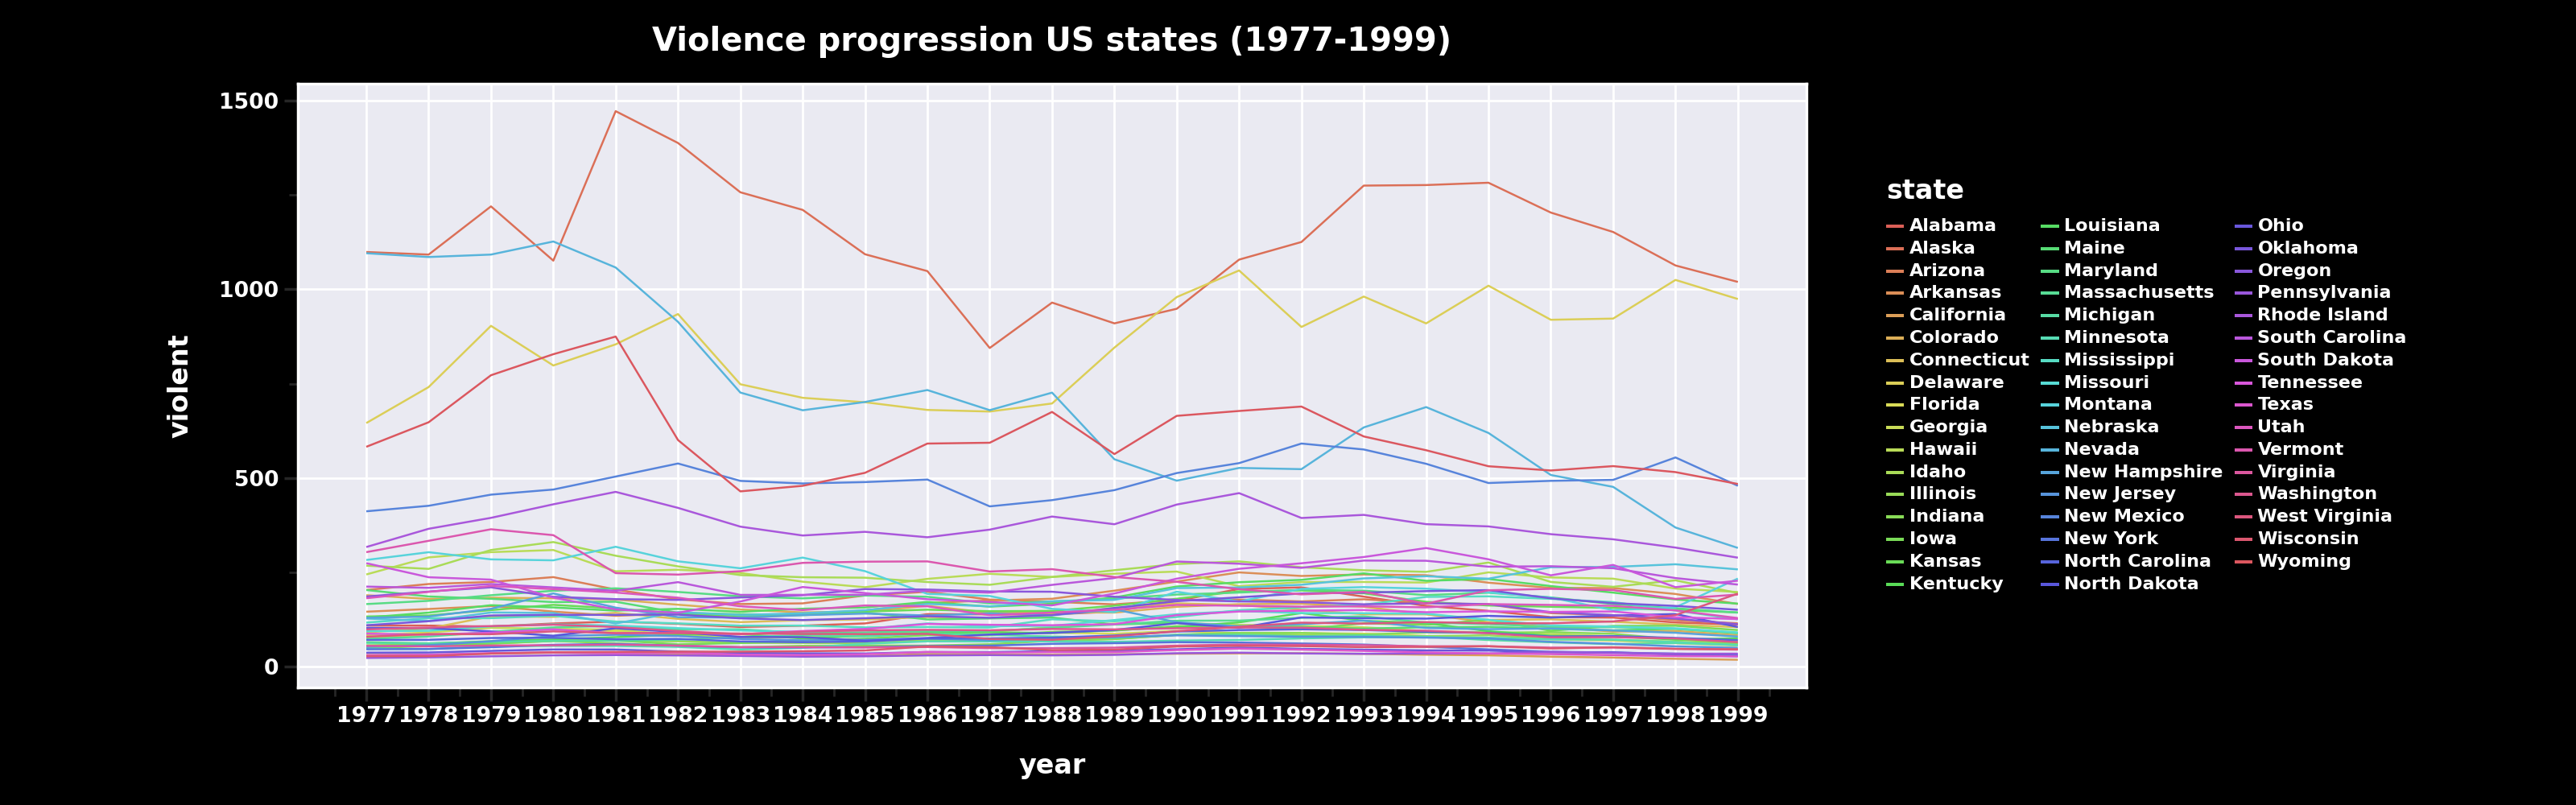

In [7]:


p = ggplot(data) + aes(x= 'year', y= 'violent', color = 'state') + geom_line() \
    + scale_x_continuous(breaks = data['year'].unique()) \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, legend_key_width=8, legend_text=element_text(size=8), figure_size=(16,5)
            , text= element_text(colour = "white", face = "bold") 
                ) \
    + ggtitle('Violence progression US states (1977-1999)') 
p

O gráfico, partindo de y = 0, mostra a comparação entre a violência nos estados ao longo dos anos, mas seria interessante mostrar a diferença entre estados que regulamentaram o porte de arma e que não regulamentaram.

Para isso, será separado o dataframe em 2, estados que regumelamentaram e que não regulamentaram.

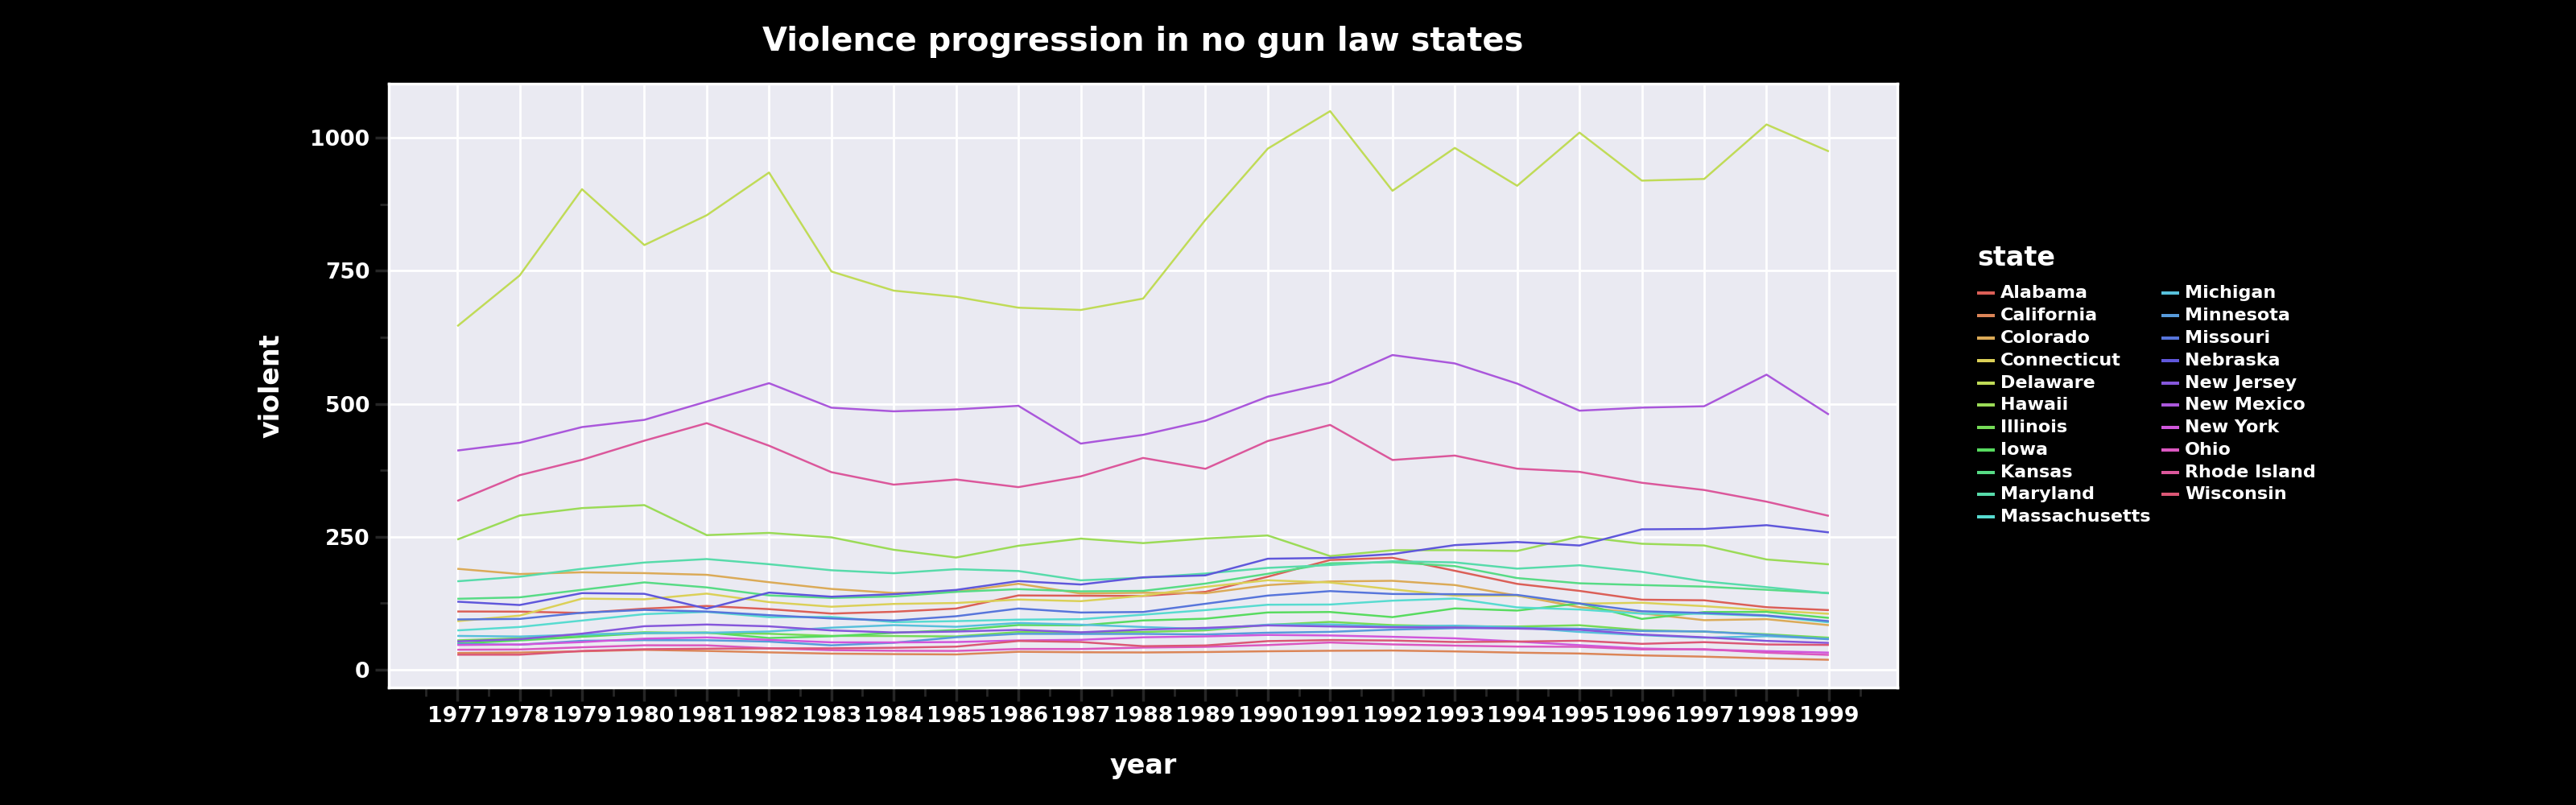

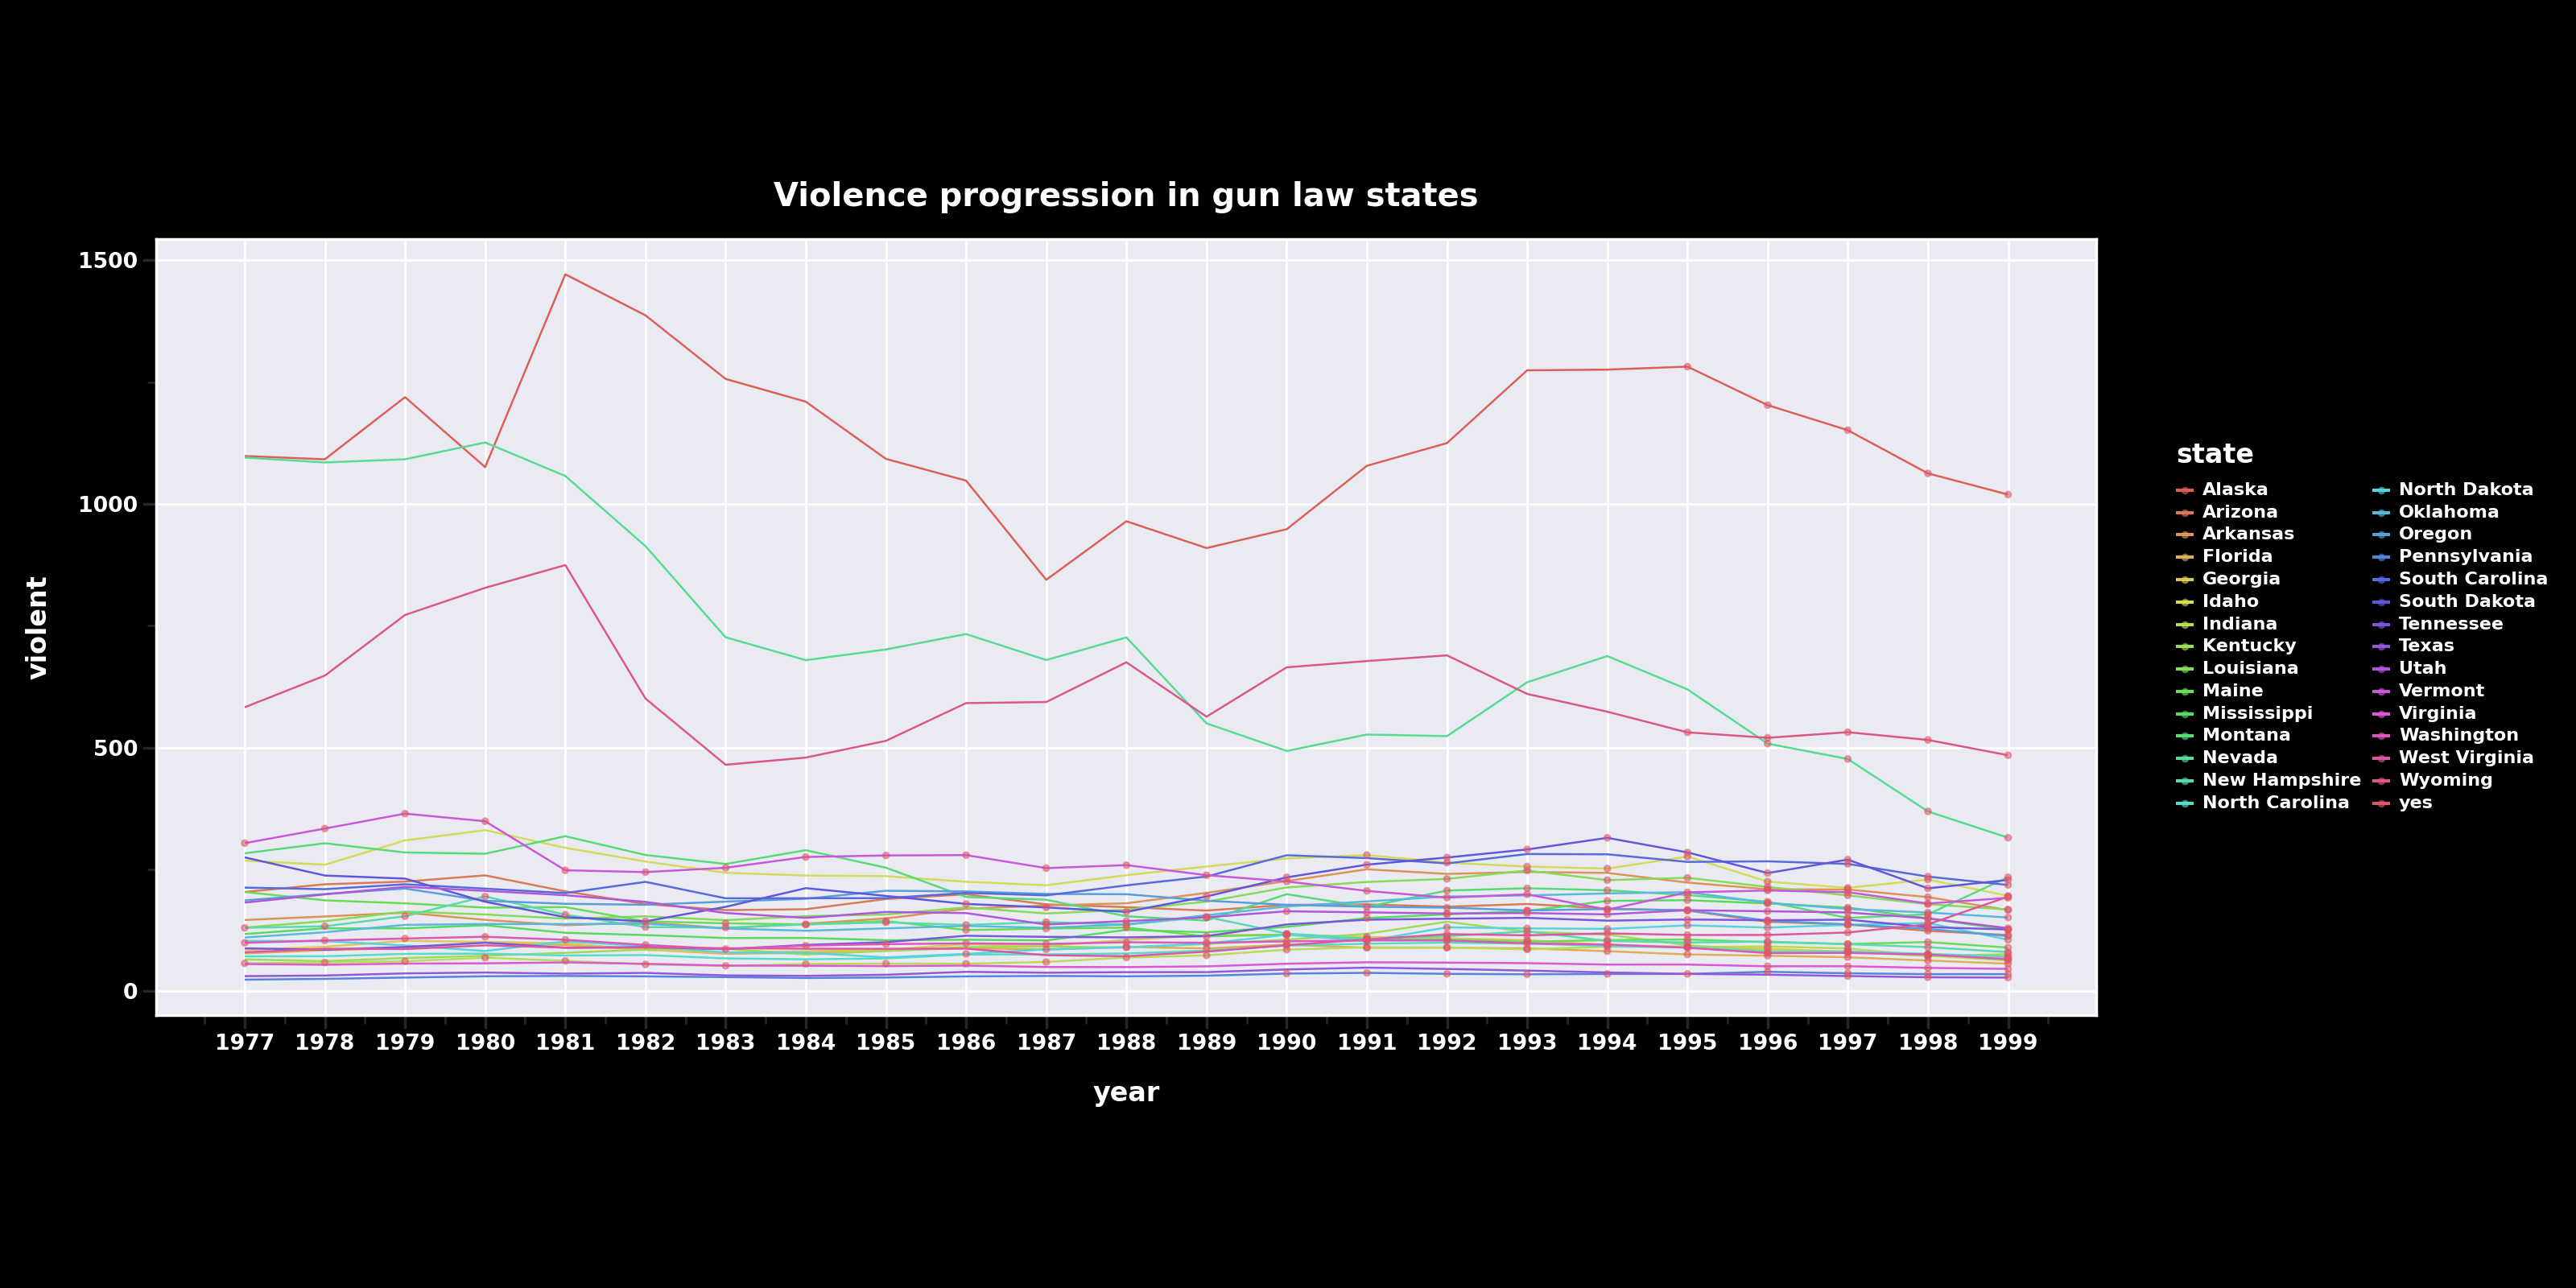

In [8]:
law_yes = data[data['law'] == 'yes']

yes_list = law_yes['state'].unique().tolist()
no_list = list(set(data['state'].unique().tolist()) - set(yes_list))

law_yes = data[data['state'].isin(yes_list)]
law_no = data[data['state'].isin(no_list)]

yes_plot = ggplot(law_yes) \
    + aes(x='year', y='violent', color='state') \
    + geom_line() \
    + geom_point(aes(color='law'), size = 1, data = law_yes[law_yes['law'] == 'yes'], alpha= 0.5)\
    + scale_x_continuous(breaks = data['year'].unique()) \
    + ggtitle('Violence progression in gun law states') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, legend_key_width=8, legend_text=element_text(size=8), figure_size=(16,8)
            , text= element_text(colour = "white", face = "bold") 
                )   
no_plot = ggplot(law_no) \
    + aes(x='year', y='violent', color='state') \
    + geom_line() \
    + scale_x_continuous(breaks = data['year'].unique()) \
    + ggtitle('Violence progression in no gun law states') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, legend_key_width=8, legend_text=element_text(size=8), figure_size=(16,5)
                        , text= element_text(colour = "white", face = "bold") 
                )  
no_plot.show()
yes_plot.show()

Os gráficos acima são de violência por ano onde não teve lei restritiva para o porte de arma e onde teve. No segundo os pontos indicam anos onde a lei estava em vigor.

Para uma melhor visualização de como a regulamentação possa ter afetado a violência em cada estado no período pode ser mostrado a curva individual de cada estado.

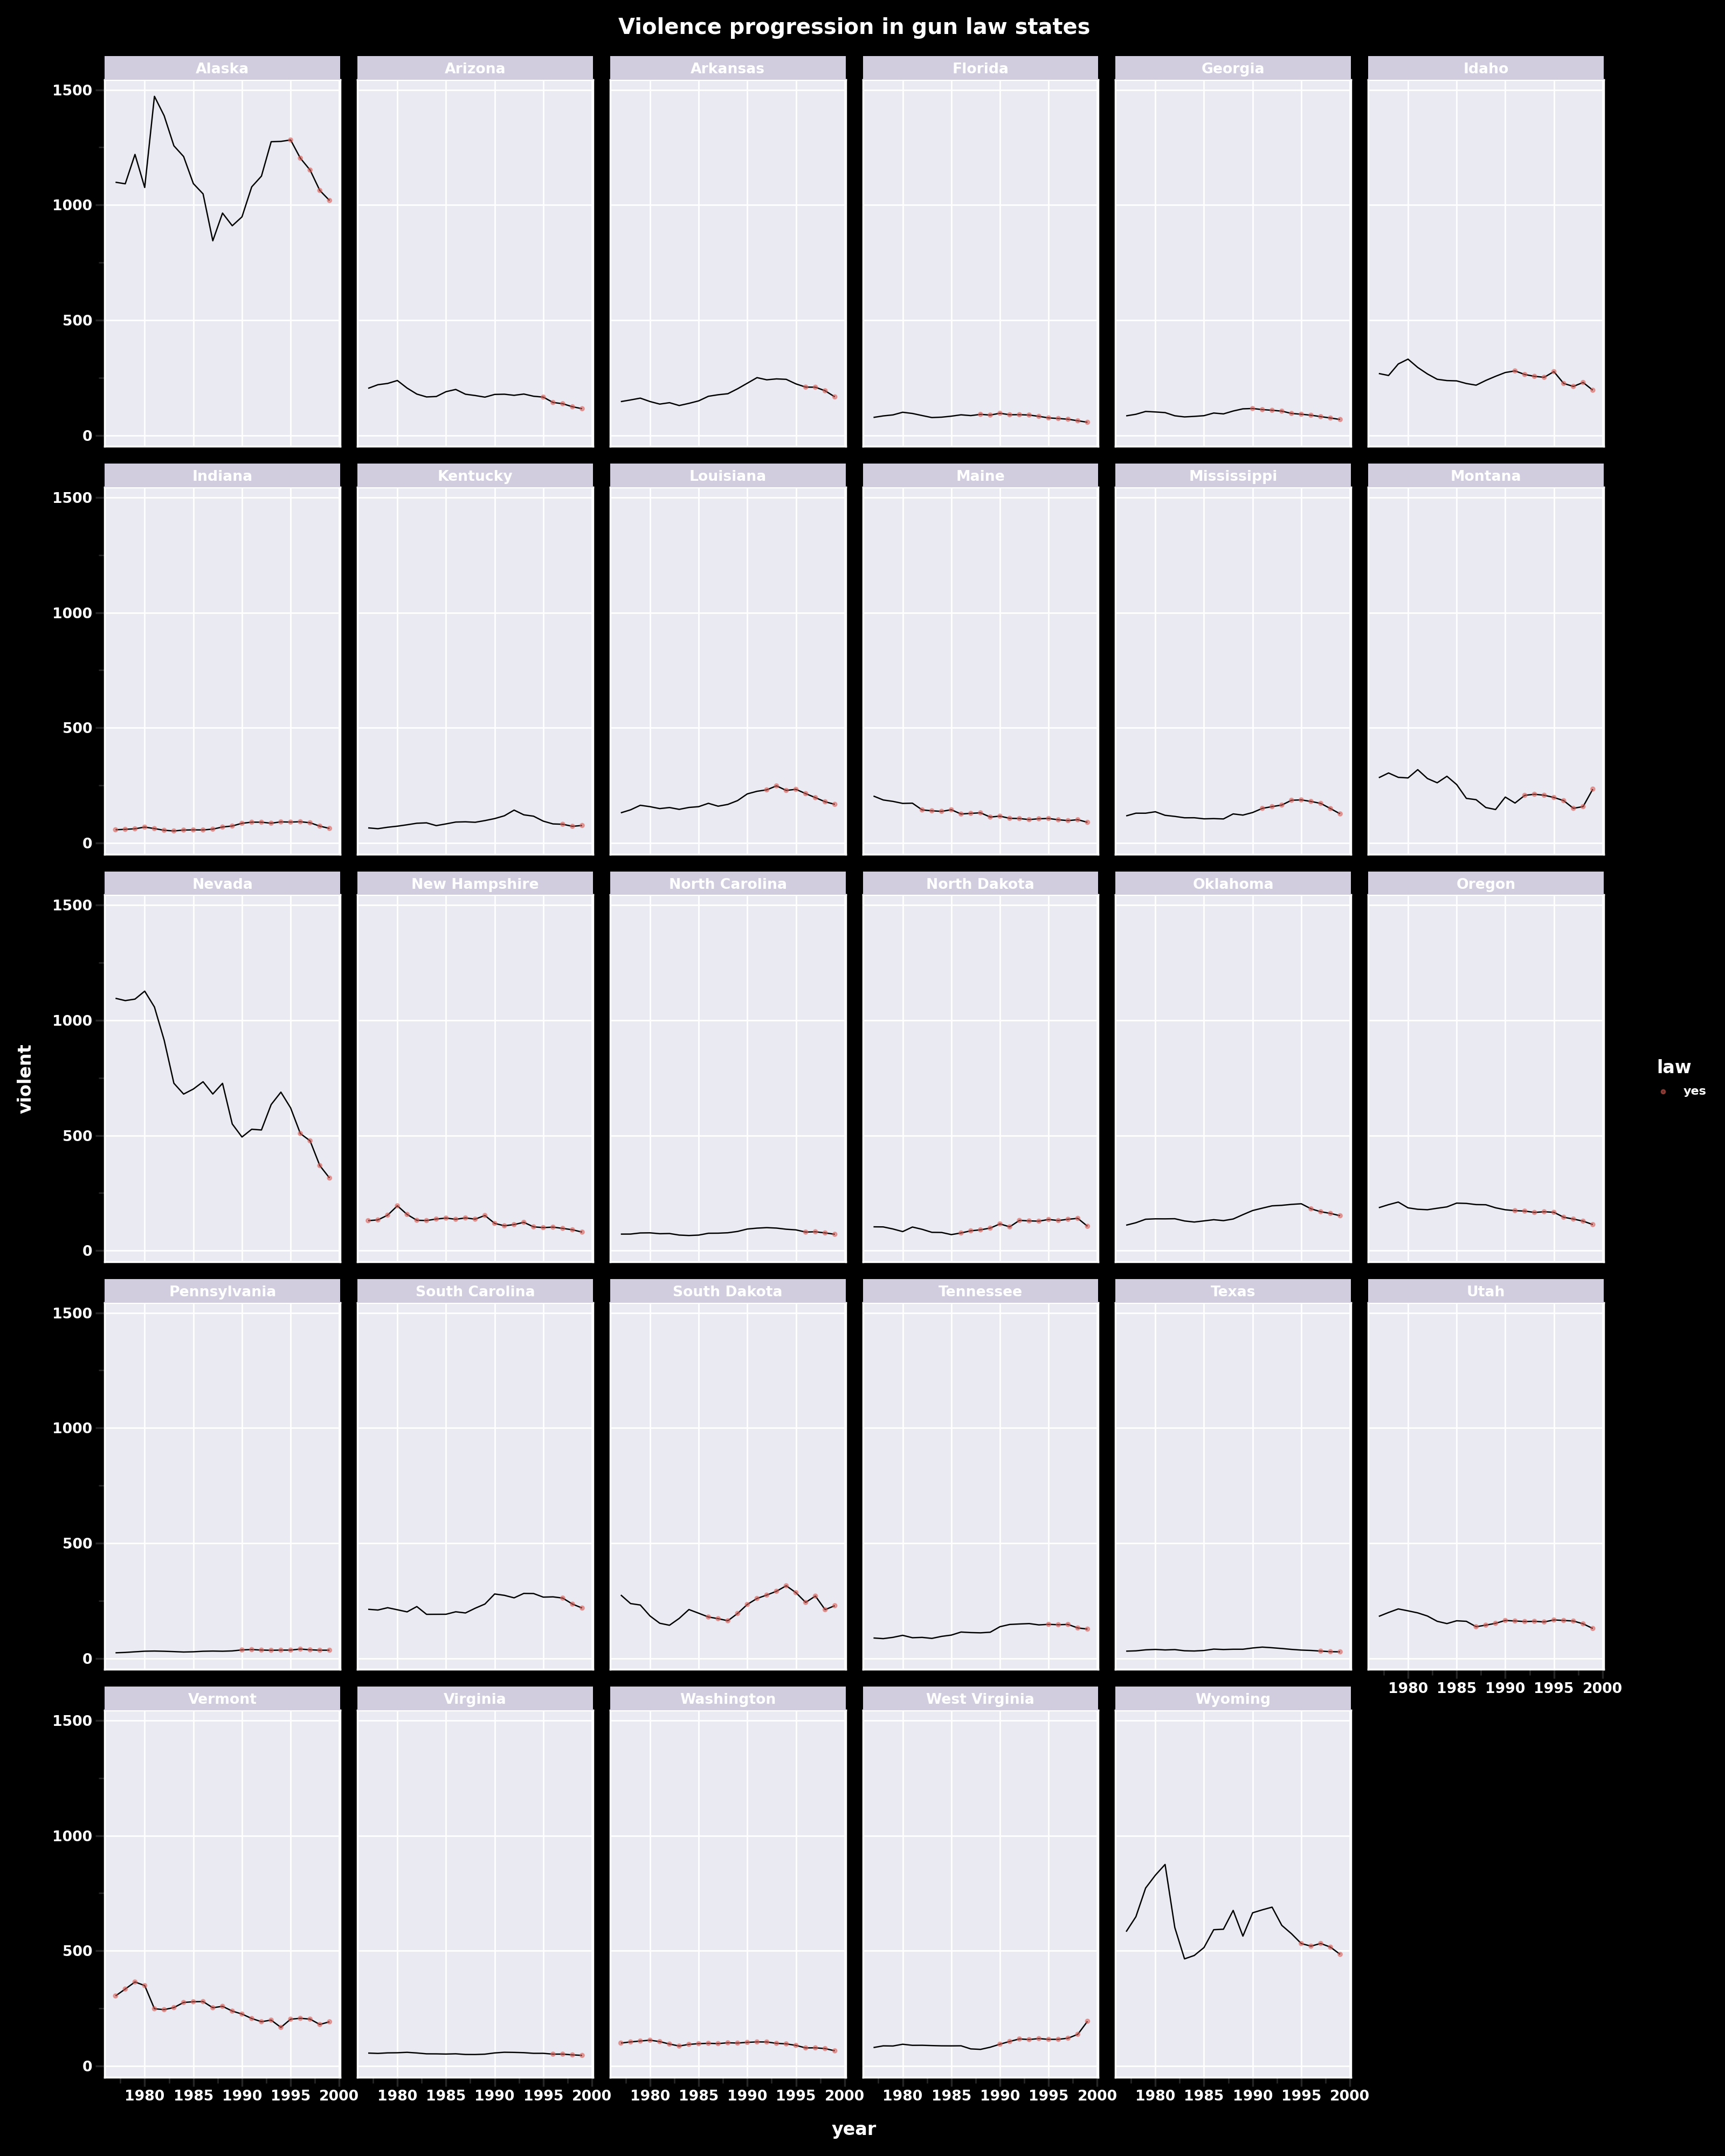

In [9]:
# law_yes = law_yes[law_yes['state'] != 'Alaska']
# law_yes = law_yes[law_yes['state'] != 'Nevada']
# law_yes = law_yes[law_yes['state'] != 'Wyoming']

yes_plot = ggplot(law_yes) \
    + aes(x='year', y='violent') \
    + geom_line() \
    + geom_point(aes(color='law'), size = 1, data = law_yes[law_yes['law'] == 'yes'], alpha= 0.5)\
    + ggtitle('Violence progression in gun law states') \
    + facet_wrap('state') \
    + theme_seaborn() \
    + theme( legend_key_width=8, legend_text=element_text(size=8), figure_size=(16,20)
            ,text= element_text(colour = "white", face = "bold"))   
yes_plot

No geral, é possível ver que estados que acataram a lei tiveram uma redução na taxa de violência comparada com o ínicio do período. Mas para melhor visualização serão comparadas as mudanças na violência média, esperando poder representar as tendências gerais dos grupos.

Então para possibilitar uma melhor comparação sempre é interessante ver a tendencia total do país antes.

Primeiro, é legal ver o comportamento médio do grupo de estados que regulamentaram e que não regulamentaram.

In [10]:
is_marked_state = np.where(data['state'].isin(yes_list), 'yes', 'no')
data['law_status'] = is_marked_state

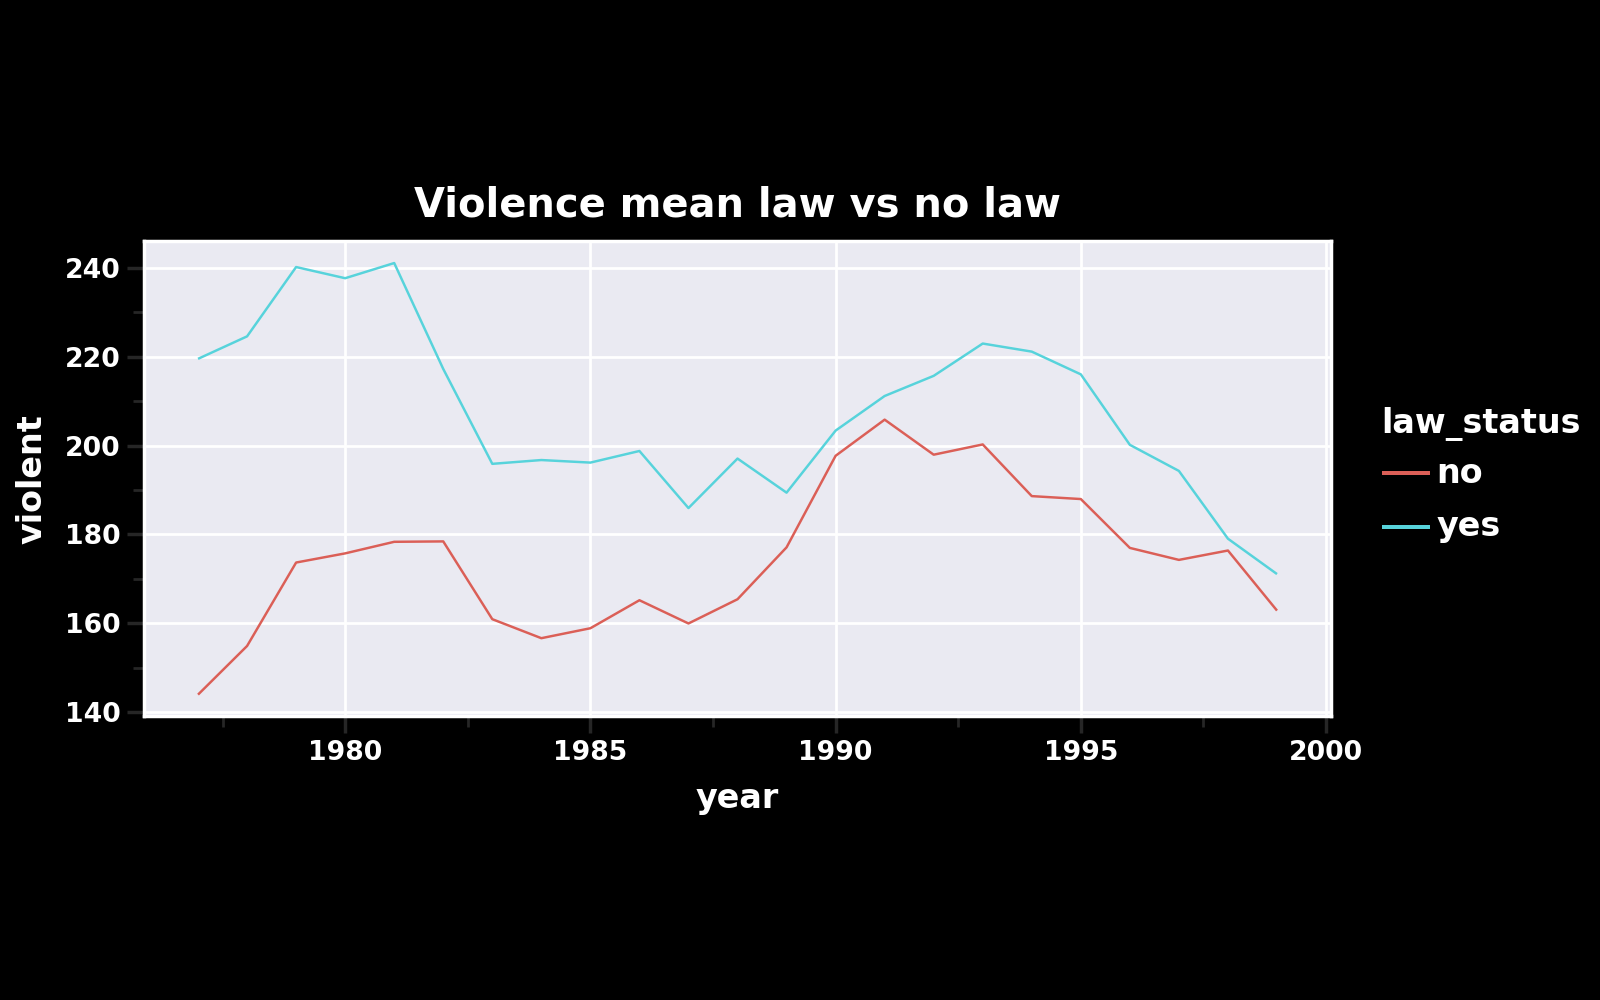

In [11]:
law_means = data.groupby(['year', 'law_status'])['violent'].mean().reset_index()

mean_plot = ggplot(law_means) \
    + aes(x='year', y='violent', color = 'law_status') \
    + geom_line() \
    + ggtitle('Violence mean law vs no law') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, figure_size=(8,5)
            , text= element_text(colour = "white", face = "bold") 
                )   

# mean_plot_geral = ggplot(law_means) \
#     + aes(x='year', y='violent') \
#     + geom_line() \
#     + ggtitle('Violence mean all states') \
#     + theme_seaborn() \
#     + theme(aspect_ratio=0.4, figure_size=(8,5)
#             , text= element_text(colour = "white", face = "bold") 
#                 )   
# mean_plot_geral.show()
mean_plot.show()

Também é um dado importante saber como a variação da violência foi em cada grupo 

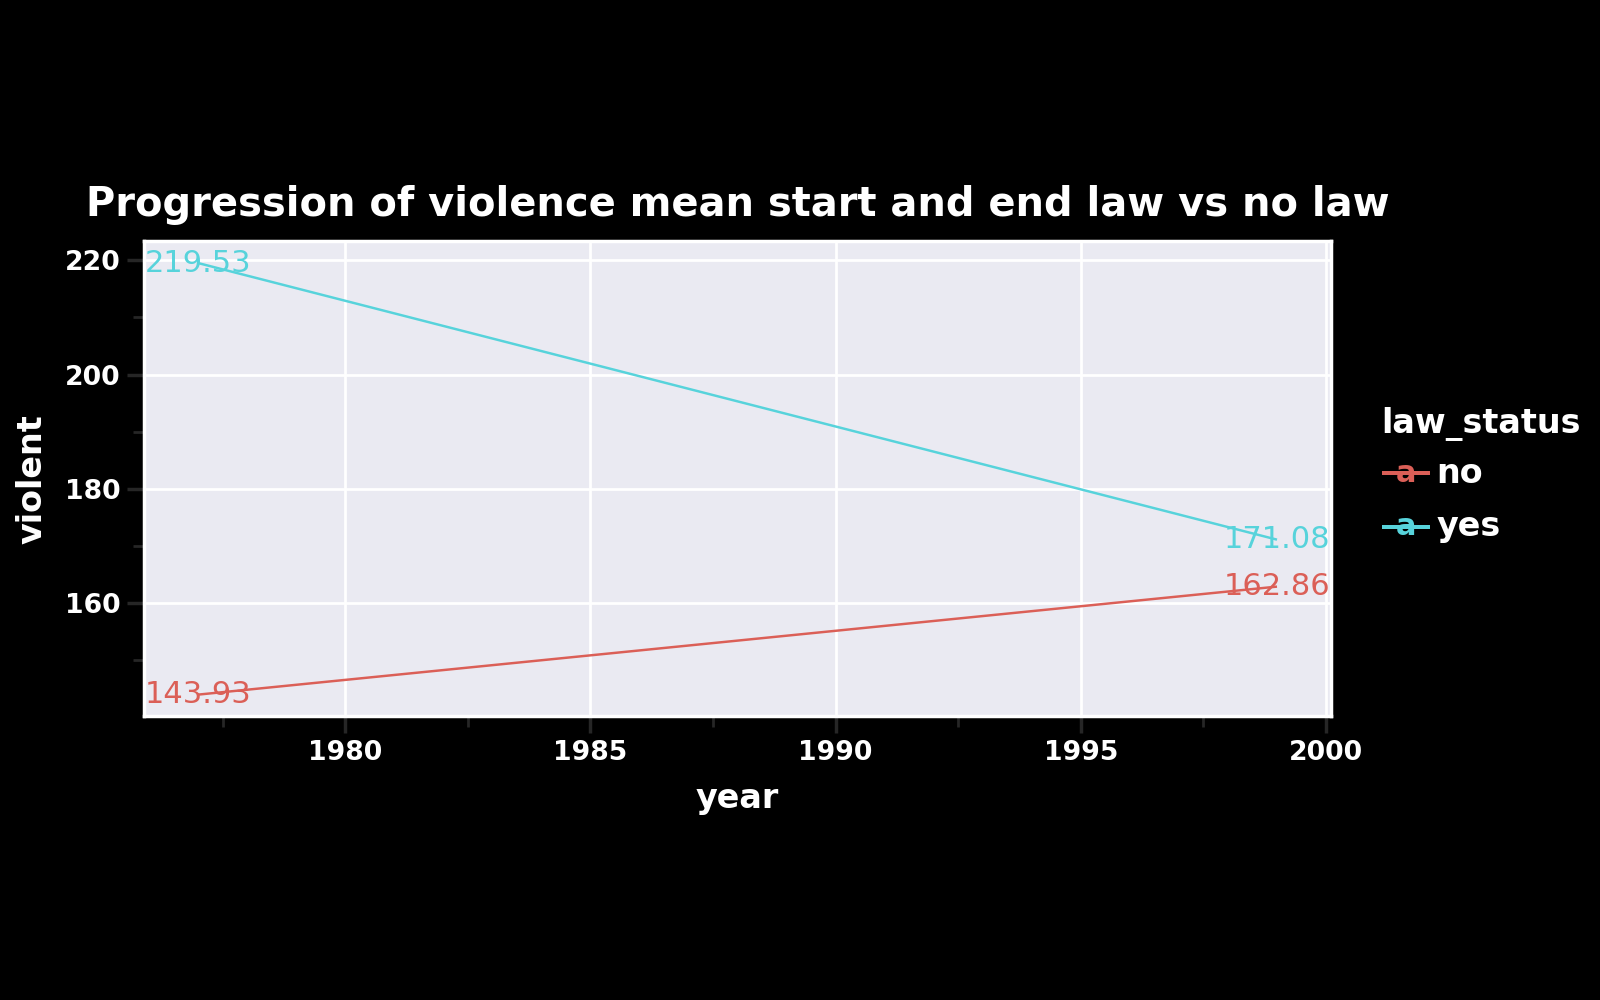

In [12]:
diff = law_means[law_means['year'].isin([1977, 1999])]
diff_plot = ggplot(diff) \
    + aes(x='year', y='violent', color = 'law_status') \
    + geom_line() \
    + geom_text(aes(label=round(diff['violent'], 2)))\
    + ggtitle('Progression of violence mean start and end law vs no law') \
    + theme_seaborn() \
    + theme(aspect_ratio=0.4, figure_size=(8,5)
            , text= element_text(colour = "white", face = "bold") 
                )  


# diff_plot_geral = ggplot(diff) \
#     + aes(x='year', y='violent') \
#     + geom_line() \
#     + geom_text(aes(label=round(diff['violent'], 2)))\
#     + ggtitle('Progression of violence mean all states mean') \
#     + theme_seaborn() \
#     + theme(aspect_ratio=0.4, figure_size=(8,5)
#             , text= element_text(colour = "white", face = "bold") 
#                 )  

# diff_plot_geral.show()
diff_plot.show() 

Soma da taxa de alteração média de violência ao longo dos anos 

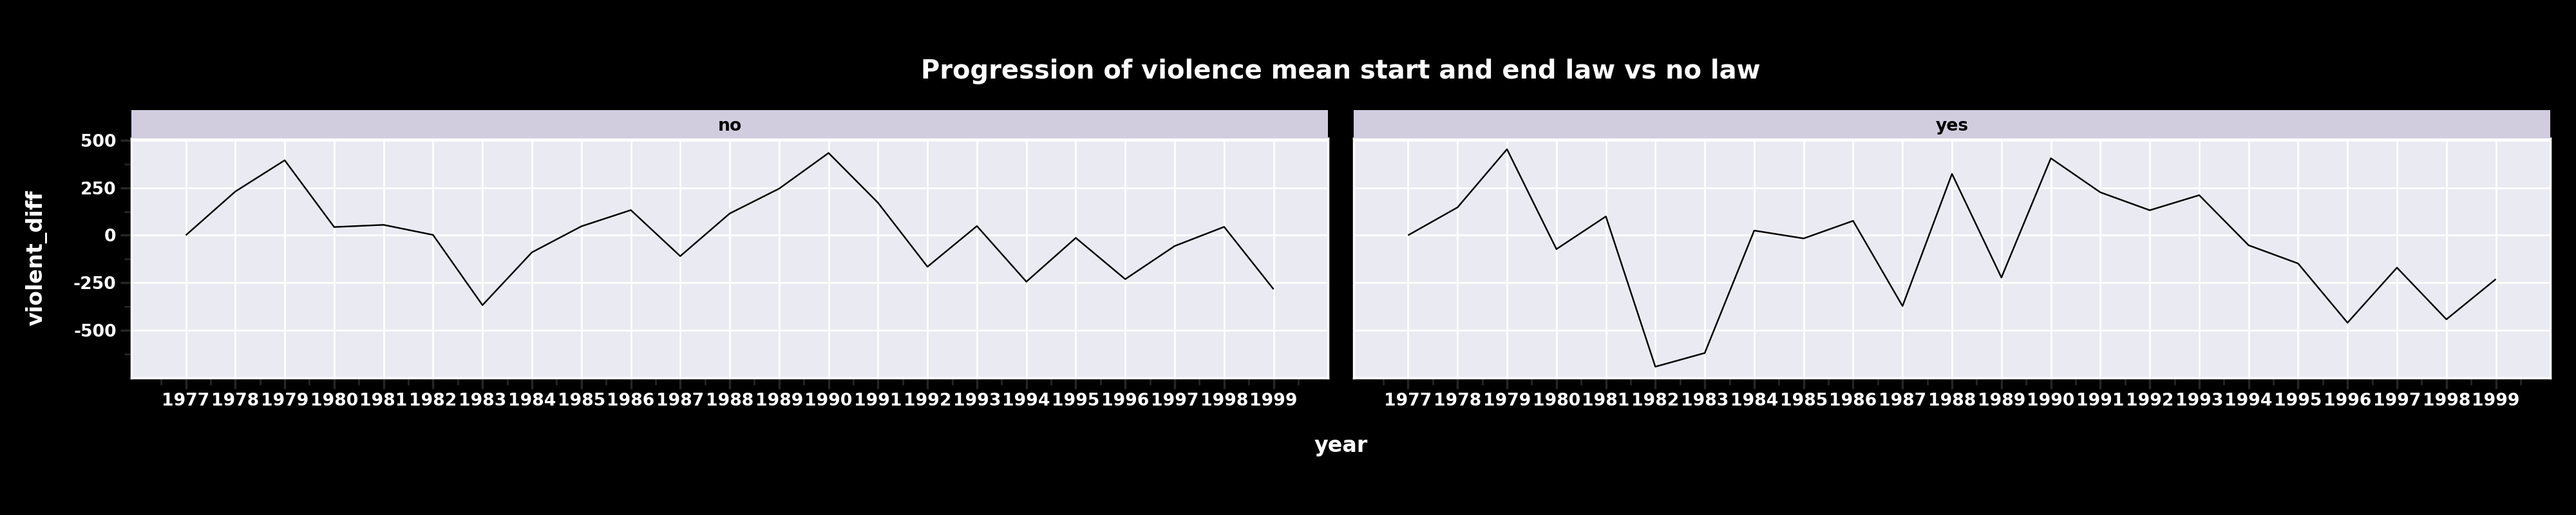

In [13]:
data['violent_diff'] = data.groupby(['state', 'law_status'])['violent'].diff(periods=1).fillna(0)
year_wise_sum = data.groupby(['year', 'law_status'])['violent_diff'].sum()
law_tendency = pd.DataFrame({'year':year_wise_sum.reset_index()['year'], 'law_status':year_wise_sum.reset_index()['law_status'],'violent_diff': year_wise_sum.values})

# law_tendency
law_tendency_plot = ggplot(law_tendency) \
     + aes(x='year', y='violent_diff')  \
     + geom_line() \
     + facet_wrap('law_status', nrow = 1) \
     + scale_x_continuous(breaks = law_tendency['year'].unique()) \
     + ggtitle('Progression of violence mean start and end law vs no law') \
     + theme_seaborn() \
     + theme(aspect_ratio=0.2, figure_size=(20,4)
             , text= element_text(colour = "white", face = "bold") 
             , strip_text = element_text(colour = "black", face = "bold") 
             )

law_tendency_plot.show()

As conclusões que são vistas nos gráficos são: 
 - As média taxas de violência no grupo de estados que não regulamentaram o porte de armas subiu, já o dos estados em que a lei estava em vigor diminuiu
  
 - Após cerca de 1990 que parece ser o momento mais violento, estados com controle de armas de fogo tiveram quedas mais significates que os que não adotaram.